In [1]:
# KNN 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Glass File

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

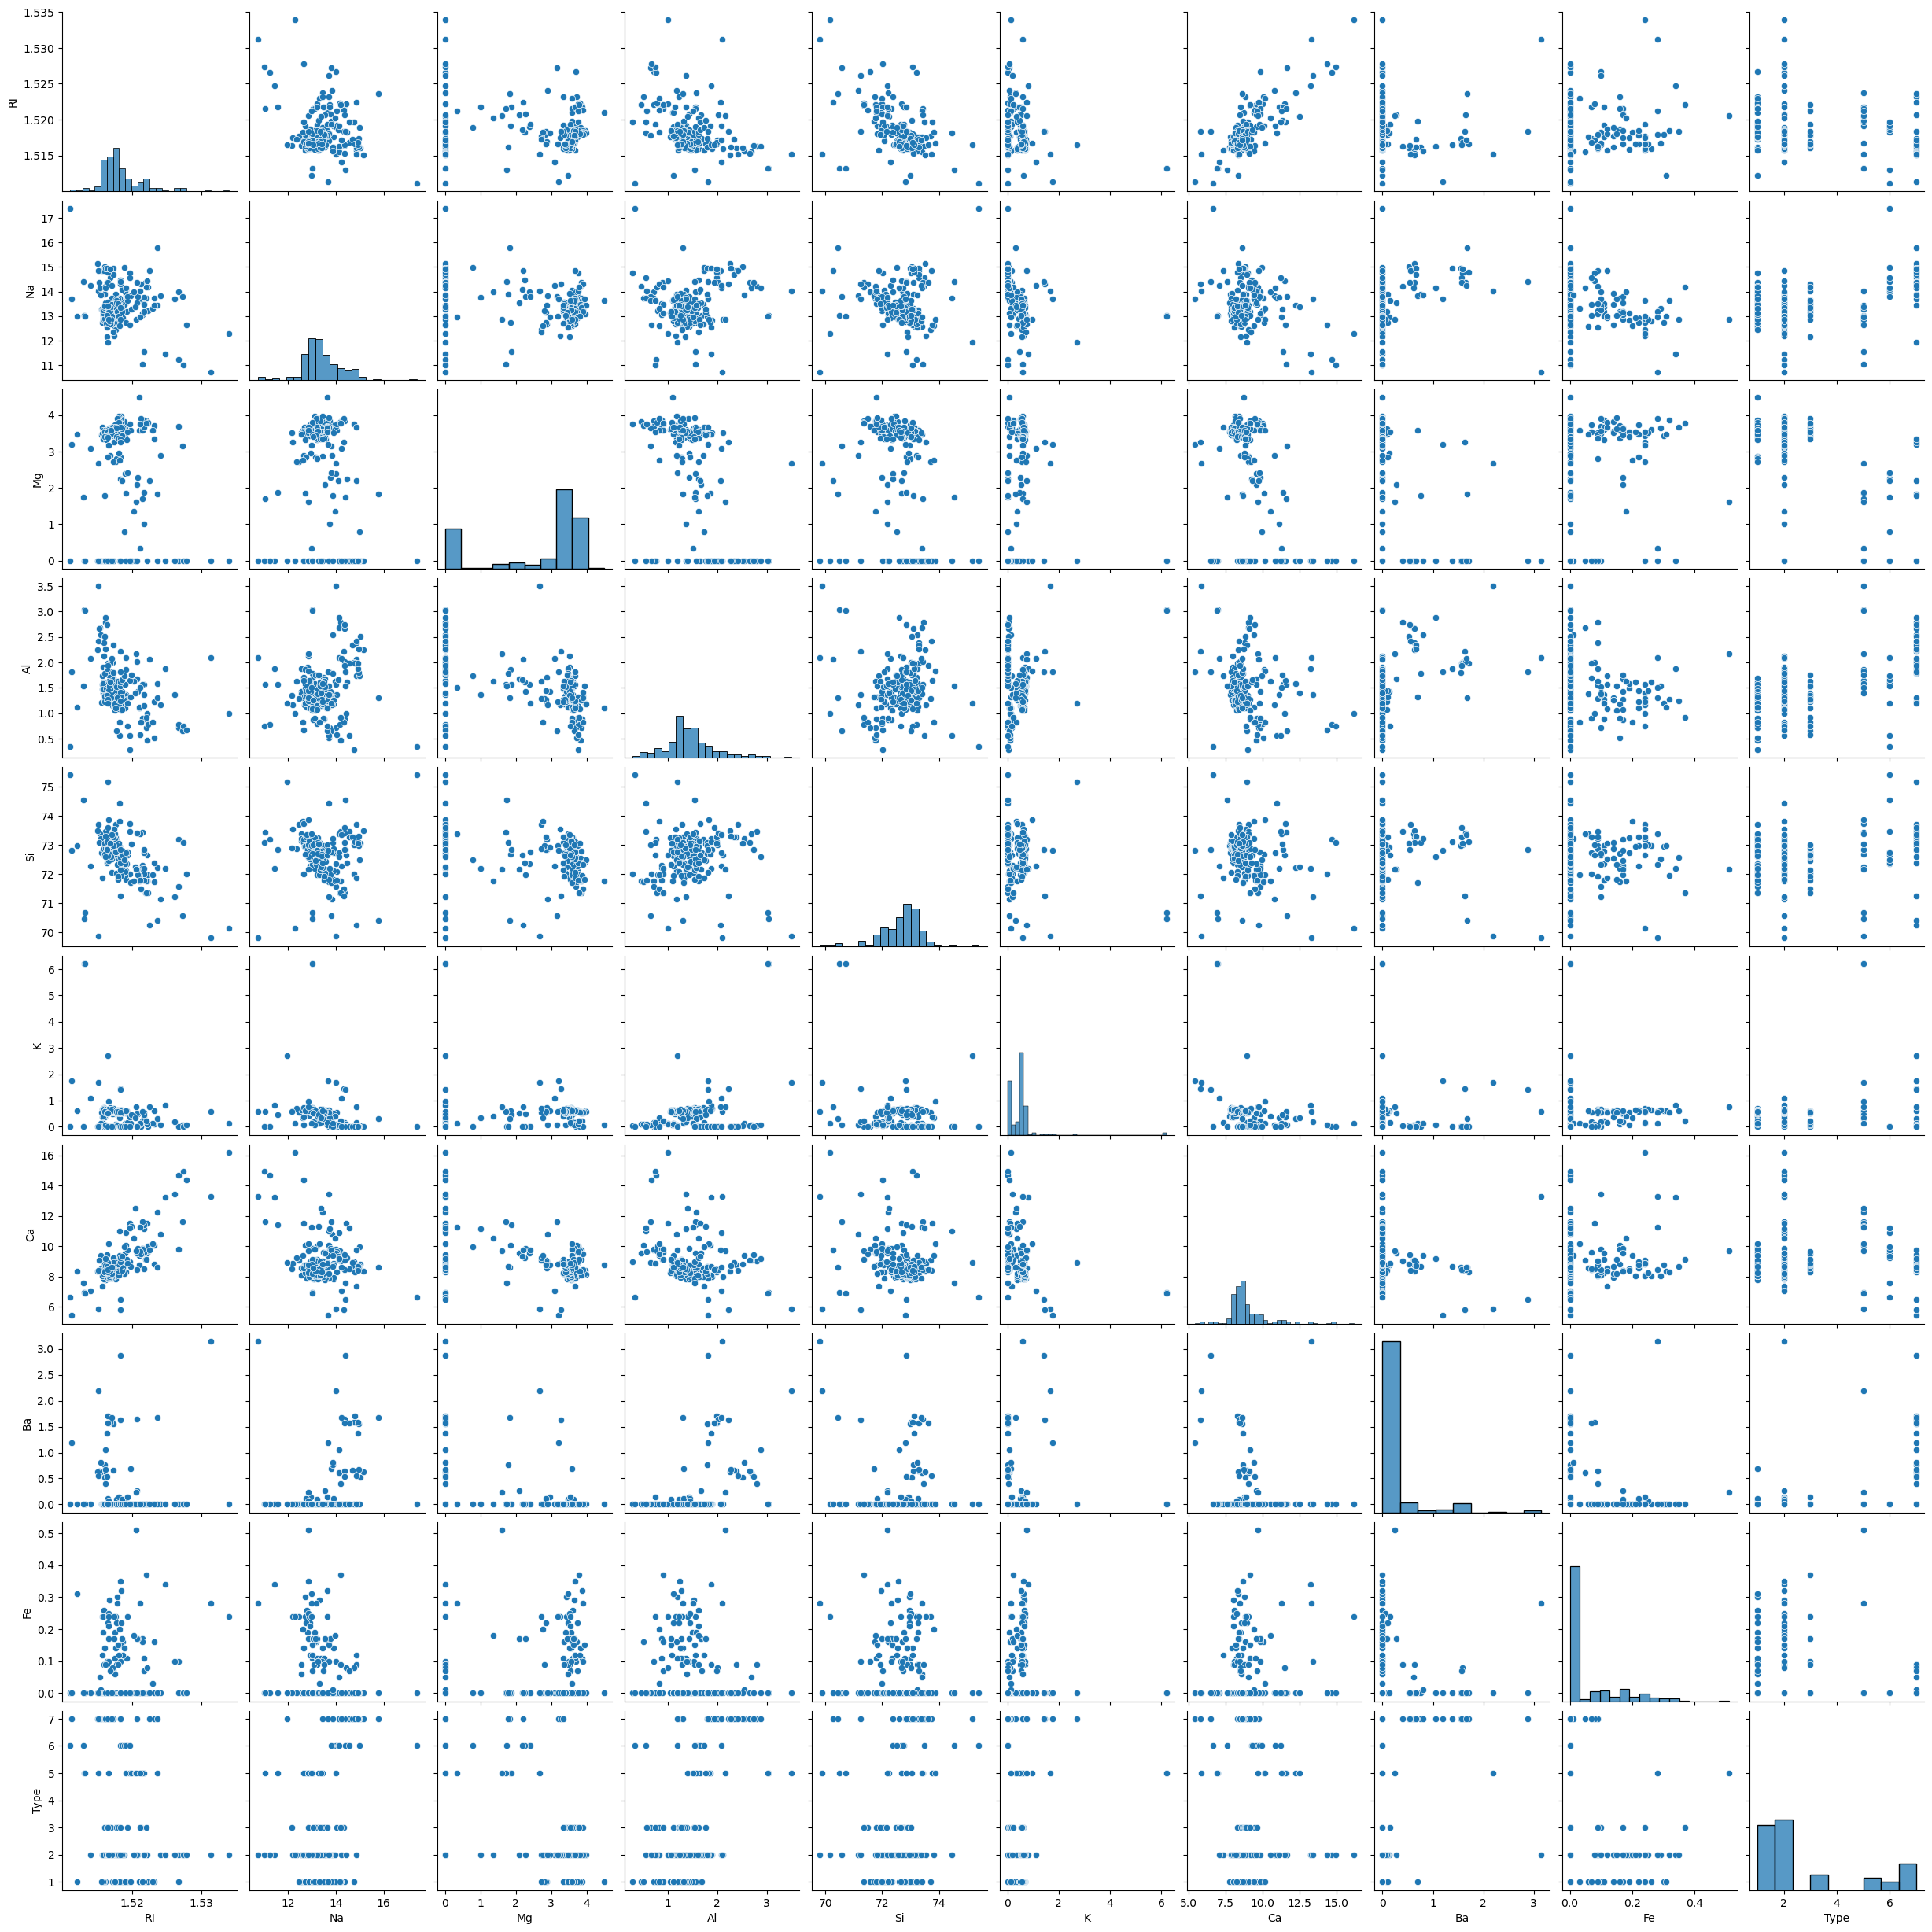

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
#Independent feature & Dependent feature

x = df.iloc[ : , : -1] 
y = df.iloc[ : , -1] 

In [7]:
#KFold

kfold = KFold(n_splits=15) 

In [8]:
#Creating model

model = KNeighborsClassifier(n_neighbors = 8)

In [9]:
#Checking the performance/accuracy of the model using Cross Validation Score instead of using train_test_split

results = cross_val_score(model, x, y, cv=kfold)
results

array([0.4       , 0.86666667, 0.93333333, 0.6       , 0.92857143,
       0.78571429, 0.28571429, 0.21428571, 0.57142857, 0.57142857,
       0.        , 0.        , 0.07142857, 0.64285714, 0.92857143])

In [10]:
print('Overall Accuracy:', results.mean())

Overall Accuracy: 0.52


In [11]:
# Grid Search for algorithm tuning

#Importing Grid Search CV

from sklearn.model_selection import GridSearchCV

In [12]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
n = np.array(range(1,40)) #n(no. of neighbors) storing in form of array(ranging from(1 to 40)) kvalue from 1-40
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [14]:
params = dict(n_neighbors = n) #entire no. of neighbors of arrays storing in form of Dictionary

#We should always give n_neighbors as whenever we will be fitting it in grid any other key it will not understand

In [15]:
params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [16]:
#Creating the model

model = KNeighborsClassifier() 

In [17]:
#GRID SEARCH CV ALGORITHM

grid = GridSearchCV(estimator = model, param_grid = params) 
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

#print the best accuracy score  = 64%
#print which parameter was the best K value(no. of neighbor from 1 to 40) : 14

#from range of 1 to 40 when the no. of neighbors was 1 we got the best accuracy score as 64%

0.640531561461794
{'n_neighbors': 1}


In [19]:
# Visualzing the CV result

k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy') 
    k_scores.append(scores.mean()) 

In [20]:
#Sorting thes best score accuracy model of K value range from 1 to 40 as bigger to smaller

pd.Series(k_scores).sort_values(ascending = False)

0     0.650216
2     0.650216
3     0.645455
4     0.645455
21    0.641991
5     0.641126
18    0.637013
17    0.632468
27    0.632468
25    0.632468
23    0.632468
19    0.632468
26    0.627922
20    0.627706
29    0.627706
28    0.627706
6     0.627056
22    0.623160
30    0.622944
1     0.622511
24    0.618615
16    0.618398
15    0.618182
7     0.617965
32    0.613636
31    0.613636
9     0.613636
13    0.613636
36    0.613420
12    0.609091
11    0.608874
33    0.608874
34    0.604113
35    0.604113
14    0.604113
38    0.599351
8     0.594805
37    0.590043
10    0.589827
dtype: float64

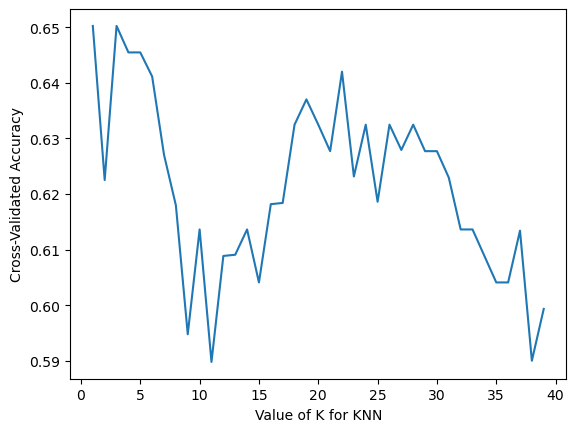

In [21]:
#Plot

plt.plot(k_range, k_scores) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Zoo File

In [22]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [24]:
df.isna().sum()/len(df)*100

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

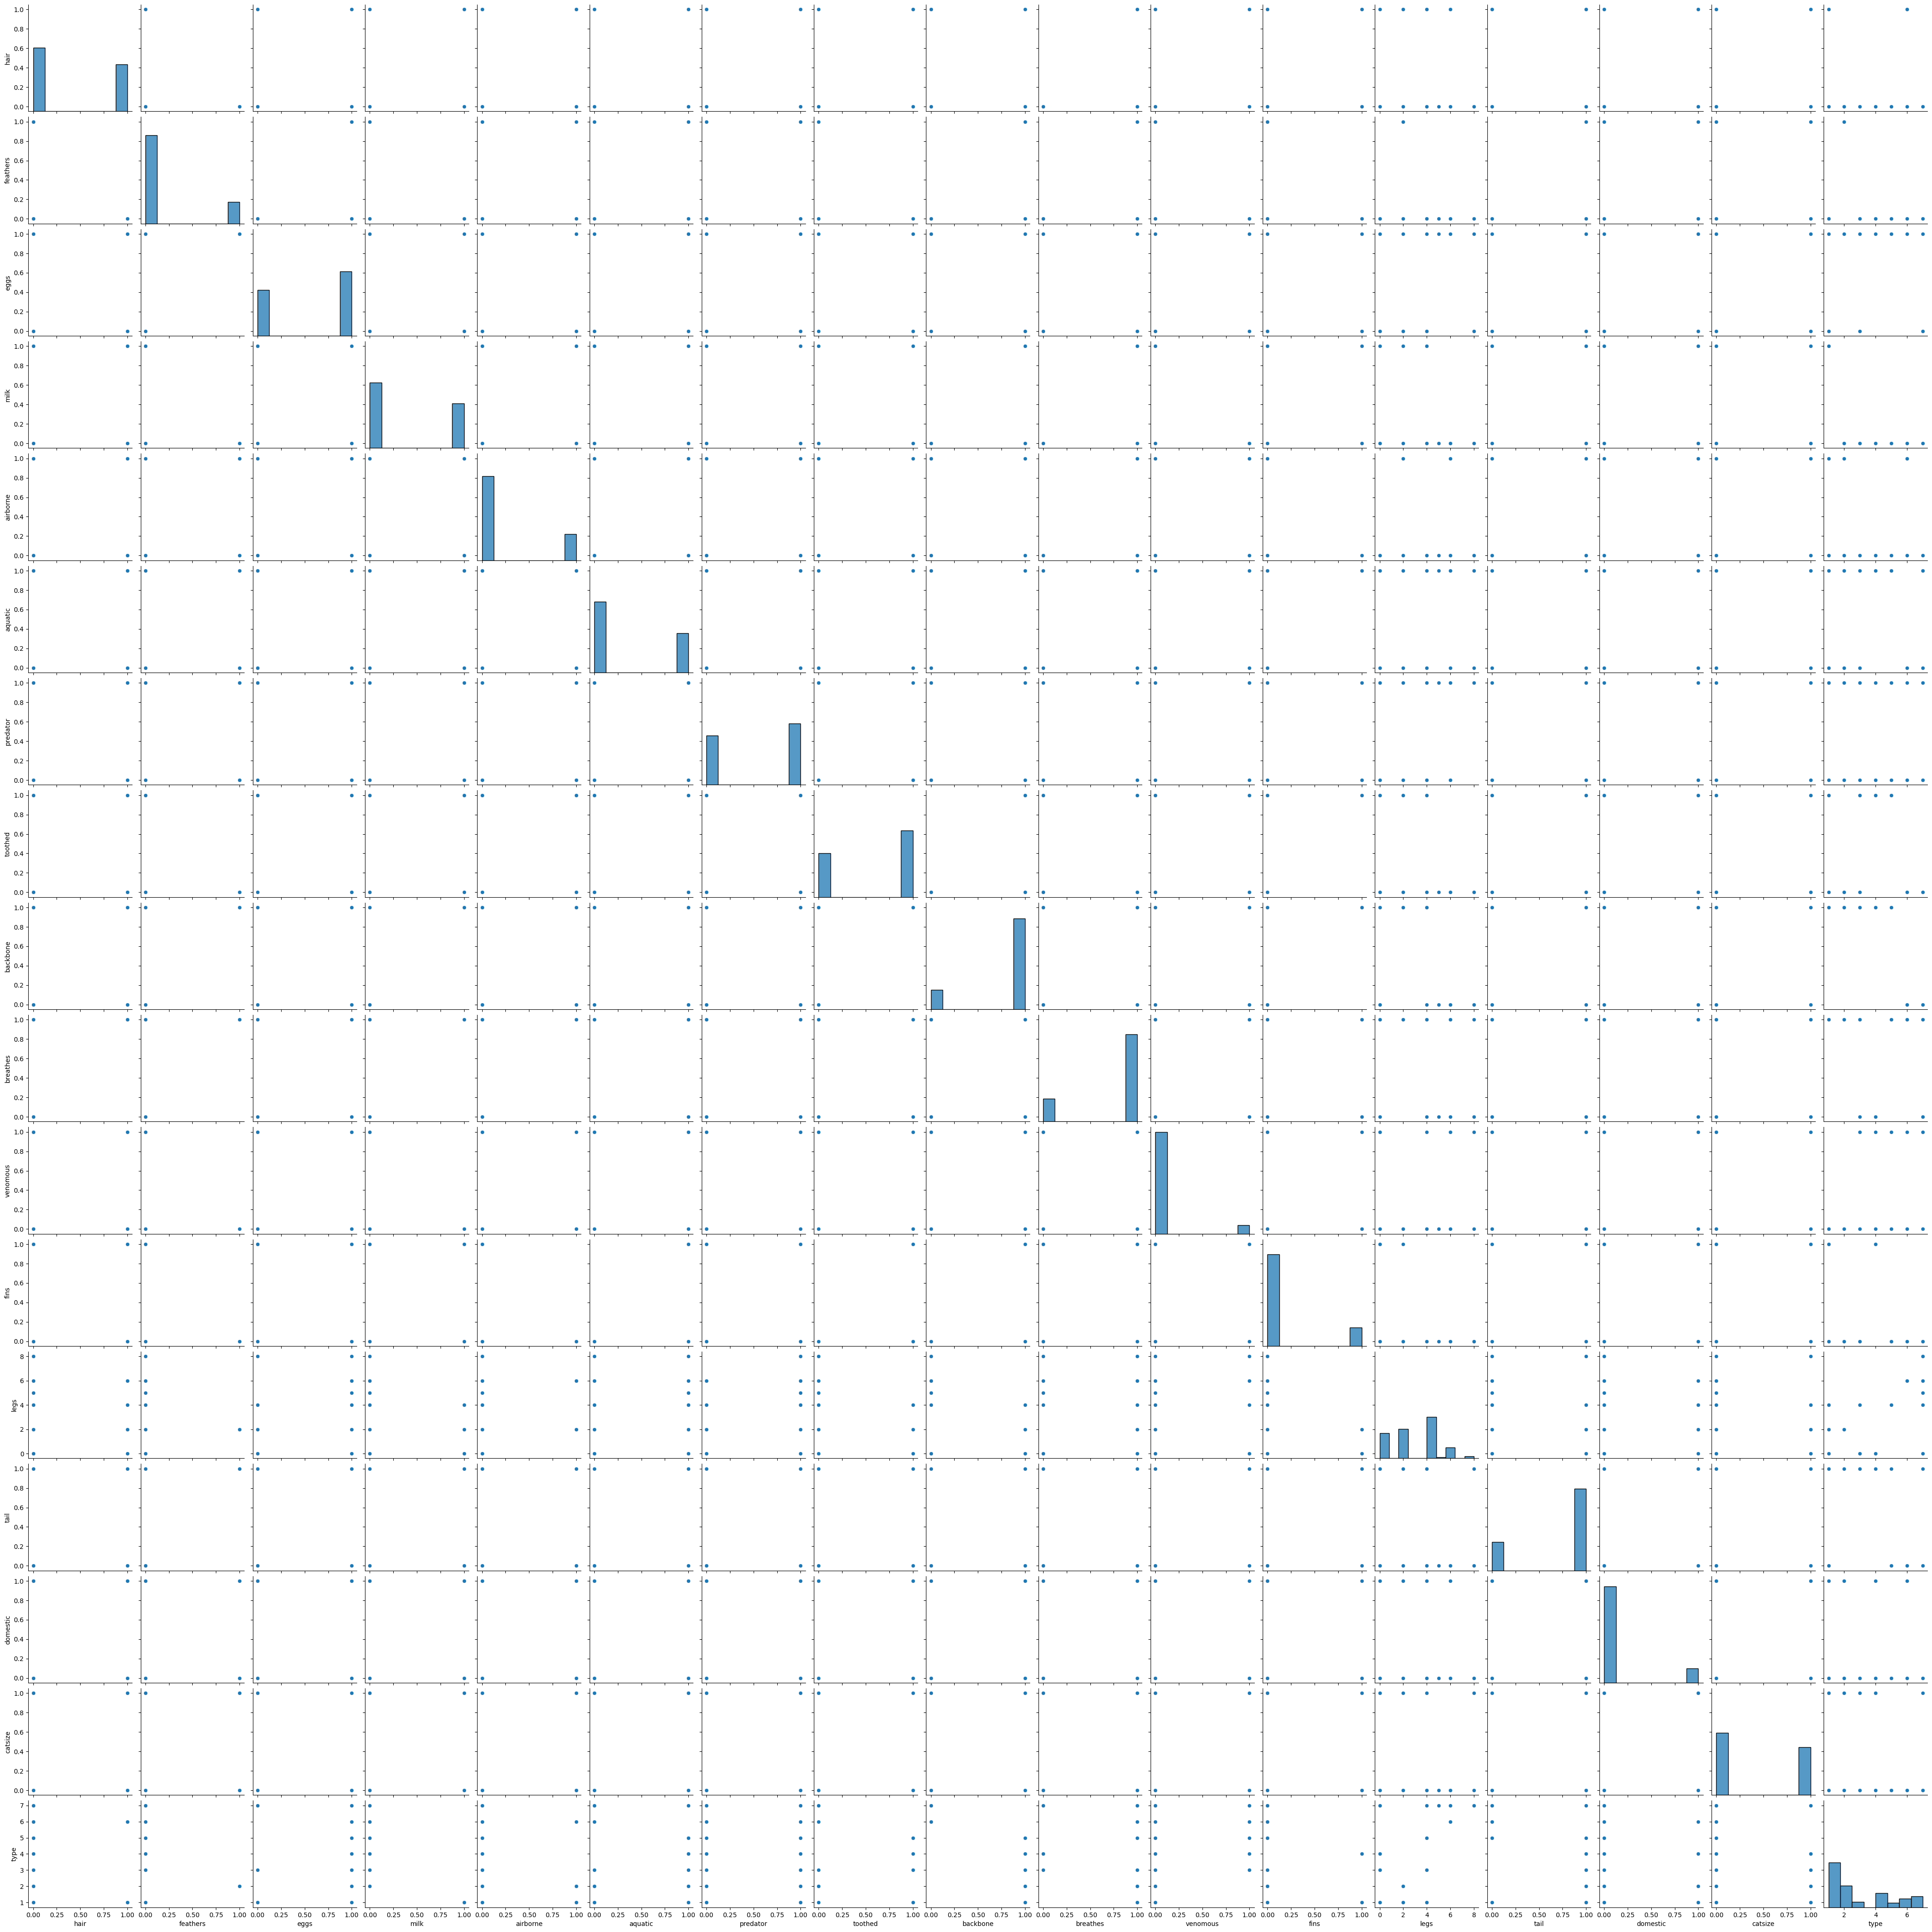

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
df.drop('animal name', axis = 1, inplace = True)

In [27]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [28]:
#independent and dependent features

x = df.iloc[ : , 0 : 16]
y = df.iloc[ : , -1]

x = x.values
y = y.values

In [29]:
#KFold

kfold = KFold(n_splits = 10)

model = KNeighborsClassifier(n_neighbors = 8)

results = cross_val_score(model, x, y, cv = kfold)
print('Overall Accuracy =',results.mean())

Overall Accuracy = 0.78


In [30]:
#Grid Search

df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [31]:
n = np.array(range(1,40)) 
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [32]:
params = dict(n_neighbors = n)
params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [33]:
#Model

model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = params) 
grid.fit(x, y)

print(grid.best_score_)
print(grid.best_params_)

#from range of 1 to 40 when the no. of neighbors was 1 we got the best accuracy score as 97%

0.97
{'n_neighbors': 1}


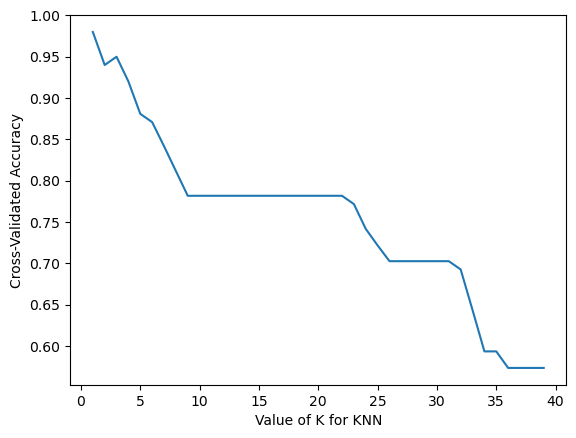

In [34]:
# Visualzing the CV result

k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy') 
    k_scores.append(scores.mean())
    
    
#Plot

plt.plot(k_range, k_scores) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()